# Python Programming for Linguists
**03 - Python for (Corpus) Linguists**

Downloading (*git cloning*) the workshop repository. The ["magic command"](https://ipython.readthedocs.io/en/stable/interactive/magics.html) `%%capture` will suppress any cell output. Be careful: `rm -r python-programming-for-linguists` will delete previous files.

In [1]:
%%capture
!rm -r python-programming-for-linguists
!git clone https://github.com/IngoKl/python-programming-for-linguists

## A. New Syntax and Tools

We will be using some new syntax and tools for these exercises. Here are some basic examples. Don't worry, these will be used rather lightly.

### 1. Miscellaneous

##### Lists and Sets



In [2]:
tokens = ['a', 'the', 'car', 'the']
tokens

['a', 'the', 'car', 'the']

In [3]:
types = set(tokens)
types

{'a', 'car', 'the'}

##### The `.join()` method (on strings)

In [4]:
tokens = ['The', 'cat', 'is', 'grey']
s1 = ' '.join(tokens)
s2 = '-'.join(tokens)

s1, s2

('The cat is grey', 'The-cat-is-grey')

##### Lambda Functions / Anonymous (nameless) Functions

In [5]:
x = lambda a: a + 10
x(5)

15

We will be using a Lambda below when using `.apply()` on a DataFrame (see Pandas).

##### `Counter` objects

In [6]:
from collections import Counter

numbers = [1, 1, 2, 3, 3, 4]
counts = Counter(numbers)

In [7]:
counts[1]

2

In [8]:
counts.most_common(2)

[(1, 2), (3, 2)]

##### Adding to Variables

Python supports the `+=`and `-=` operators to easily add or substract from a variable. This also works when concatenating strings.

In [9]:
a = 1
a += 5

a

6

In [10]:
b = 'Hello'
b += 'World'

b

'HelloWorld'

##### Enumerate

In [11]:
l = ['A', 'B', 'C']

for i in l:
  print(l)

['A', 'B', 'C']
['A', 'B', 'C']
['A', 'B', 'C']


In [12]:
for e, i in enumerate(l):
  print(e, i)

0 A
1 B
2 C


##### Slicing Notation

The syntax is: *start:stop:step* 

In [13]:
l = [0, 1, 2, 3, 4, 5]

In [14]:
l[1:3]

[1, 2]

In [15]:
l[0:5:2]

[0, 2, 4]

### 2. List Comprehensions

In [16]:
numbers = [1, 2, 3]
n_times_ten = []

for number in numbers:
  n_times_ten.append(number * 10)

n_times_ten

[10, 20, 30]

In [17]:
[n * 10 for n in numbers]

[10, 20, 30]

In [18]:
lol = [
       [1, 'A'],
       [2, 'B'],
       [3, 'C']
]

lol

[[1, 'A'], [2, 'B'], [3, 'C']]

In [19]:
for n in lol:
  print(n[1])

A
B
C


In [20]:
[n[1] for n in lol]

['A', 'B', 'C']

### 3. Pandas

When importing libraries, we can use `as` to give the library another name. For `pandas`, it is convention to simple use `pd` as an alias.

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame()

df['Document'] = [0, 1, 2, 3]
df['Tokens'] = [1000, 2000, 3000, 3000]
df['Sentiment'] = [0.2, 0.3, 0.8, None]

df

,Document,Tokens,Sentiment
0,0,1000,0.2
1,1,2000,0.3
2,2,3000,0.8
3,3,3000,NaN


Pandas has many methods that help with getting data into your programs. For example, here we are using `read_csv()` to read a CSV file.

In [23]:
df_2 = pd.read_csv('python-programming-for-linguists/2020/data/numerical/pandas_demo.csv')

In [24]:
df = df.set_index('Document')

In [25]:
df['Tokens']

Document
0    1000
1    2000
2    3000
3    3000
Name: Tokens, dtype: int64

In [26]:
df['Tokens'].mean()

2250.0

In [27]:
df['Sentiment'].describe()

count    3.000000
mean     0.433333
std      0.321455
min      0.200000
25%      0.250000
50%      0.300000
75%      0.550000
max      0.800000
Name: Sentiment, dtype: float64

In [28]:
df[df['Tokens'] > 2000]

,Tokens,Sentiment
Document,,
2,3000,0.8
3,3000,NaN


This selection works based on boolean logic (True/False). `df['Tokens'] > 2000` will return a series of True/False statements for each row in the DataFrame that correspond to the criteria (`> 2000`).

In [29]:
df['Tokens'] > 2000

Document
0    False
1    False
2     True
3     True
Name: Tokens, dtype: bool

In [30]:
df.fillna(df.mean())

,Tokens,Sentiment
Document,,
0,1000,0.200000
1,2000,0.300000
2,3000,0.800000
3,3000,0.433333


The `.apply()` Method can be used to apply a function to a row.

In [31]:
def double(x):
  '''This function will double a given number.'''
  return x * 2

We will `apply` the `double` function to axis 1 (rows). As you can see, all numbers have doubled.

In [32]:
df.apply(double, axis=1)

,Tokens,Sentiment
Document,,
0,2000.0,0.4
1,4000.0,0.6
2,6000.0,1.6
3,6000.0,NaN


Sometimes we might want to use column values while using apply. Here Lambdas come into play. In the example below, we want to create a new column that contains *Sentiment* times 100. We will be using a very simple function `times100` to do that. In the `.apply()` method, we will be using a Lambda to pass the relevant column (*Sentiment*) to the function.

In [33]:
def time100(x):
  return x * 100

In [34]:
df['Sx100'] = df.apply(lambda row : time100(row[1]), axis=1)
df

,Tokens,Sentiment,Sx100
Document,,,
0,1000,0.2,20.0
1,2000,0.3,30.0
2,3000,0.8,80.0
3,3000,NaN,NaN


## B. Exercises (8 to 16)

### Environment

Here, we are setting up our environment. First, we are installing two additional libraries/dependencies - `textdirectory` and `justext`.

Then we are `import`-ing all the needed dependencies.

Finally, we are using two scripts, provided in the repository, to download two corpora.

In [35]:
%%capture
!pip install textdirectory --upgrade
!pip install justext

In [36]:
# Basics from Python's standard library
import re
import statistics
import math

from collections import Counter
from operator import itemgetter

from io import StringIO

# Data Science
import pandas as pd

# XML
import lxml

# NLP
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
from spacy import displacy
import textdirectory

# Web
import requests
from bs4 import BeautifulSoup
import justext

# Formatting output
from tabulate import tabulate

In [37]:
%%capture
!cd python-programming-for-linguists/2020/data && sh download_hum19uk.sh
!cd python-programming-for-linguists/2020/data && sh download_coca.sh

### Exercise 8 – Concordancer

In [38]:
wikipedia = textdirectory.TextDirectory(directory='python-programming-for-linguists/2020/data/wikipedia', autoload=True)

We can use `.get_text()` to get the actual text. If the documents/files have not been transformed yet, this will simply load the text from the given file.

Be careful: `.get_text()` can also provide you with texts that are not part of the aggregation (i.e., that have been filtered out).

In [39]:
wikipedia.get_text(0)

'Cologne is the largest city of Germany\'s most populous federal state of North Rhine-Westphalia and the fourth-most populous city in Germany. With slightly over a million inhabitants (1.09 million) within its city boundaries, Cologne is the largest city on the Rhine and also the most populous city both of the Rhine-Ruhr Metropolitan Region, which is Germany\'s largest and one of Europe\'s major metropolitan areas, and of the Rhineland. Centered on the left bank of the Rhine, Cologne is about 45 kilometres (28 mi) southeast of North Rhine-Westphalia\'s capital of Düsseldorf and 25 kilometres (16 mi) northwest of Bonn. It is the largest city in the Central Franconian and Ripuarian dialect areas.\nThe city\'s Cologne Cathedral (Kölner Dom) is the seat of the Catholic Archbishop of Cologne. There are many institutions of higher education in the city, most notably the University of Cologne (Universität zu Köln), one of Europe\'s oldest and largest universities, the Technical University of 

#### RegEx-Based Approach

It is technically not necessary to `compile` the regular expression. However, it often makes the code more readable and it is also advisable when using the same expression multiple times.

In [40]:
cologne = wikipedia.get_text(0)
regex = re.compile(r'.{0,25}city\b.{25}|city\b.{0,25}', re.IGNORECASE)
concordances = re.findall(regex, cologne)

concordances

["Cologne is the largest city of Germany's most populo",
 'the fourth-most populous city in Germany. With slightl',
 '1.09 million) within its city boundaries, Cologne is t',
 'he largest city on the Rhine and also th',
 'e most populous city both of the Rhine-Ruhr M',
 ' Bonn. It is the largest city in the Central Franconia',
 "The city's Cologne Cathedral (Köl",
 ' higher education in the city, most notably the Univer',
 ' in the southeast of the city. The main airport for th',
 "he French version of the city's name, has become stand",
 'ring the Middle Ages the city flourished as being loca',
 'ior to World War II, the city had undergone several oc',
 ' tonnes) of bombs on the city. The bombing reduced the',
 'troyed almost the entire city centre. With the intenti']

#### Token-Based Approach

Below we will define a `tokenize` function, which we will use repeatedly. This simple regex tokenizer, despite its simplicity, works quite well for English. Feel free to replace this function with something more powerful!

In [41]:
def tokenize(text):
  return re.findall(r'\w+', text)

In [42]:
tokenize('Hello world')

['Hello', 'world']

In this variant, we are not differentiating between the left and right span.

In [43]:
cologne_tokenized = tokenize(cologne)
search_word = 'city'
lr = 4

for id in range(len(cologne_tokenized)):
  if cologne_tokenized[id] == search_word:
    kwic = ' '.join(cologne_tokenized[id - lr : id + lr + 1])
    print(kwic)

Cologne is the largest city of Germany s most
the fourth most populous city in Germany With slightly
09 million within its city boundaries Cologne is the
Cologne is the largest city on the Rhine and
also the most populous city both of the Rhine
It is the largest city in the Central Franconian
Ripuarian dialect areas The city s Cologne Cathedral Kölner
higher education in the city most notably the University
the southeast of the city The main airport for
French version of the city s name has become
the Middle Ages the city flourished as being located
World War II the city had undergone several occupations
of bombs on the city The bombing reduced the
destroyed almost the entire city centre With the intention


Here, we are creating two separate strings for the left and right span. These are then printed using `tabulate`.

In [44]:
cologne_tokenized = tokenize(cologne)
search_word = 'city'
lr = 4
kwic = []

for id in range(len(cologne_tokenized)):
  if cologne_tokenized[id] == search_word:

    l = ' '.join(cologne_tokenized[id - lr:id])
    r = ' '.join(cologne_tokenized[id + 1: id + lr + 1])
    kwic.append([l, search_word, r])

print(tabulate(kwic))

---------------------------  ----  ---------------------------------
Cologne is the largest       city  of Germany s most
the fourth most populous     city  in Germany With slightly
09 million within its        city  boundaries Cologne is the
Cologne is the largest       city  on the Rhine and
also the most populous       city  both of the Rhine
It is the largest            city  in the Central Franconian
Ripuarian dialect areas The  city  s Cologne Cathedral Kölner
higher education in the      city  most notably the University
the southeast of the         city  The main airport for
French version of the        city  s name has become
the Middle Ages the          city  flourished as being located
World War II the             city  had undergone several occupations
of bombs on the              city  The bombing reduced the
destroyed almost the entire  city  centre With the intention
---------------------------  ----  ---------------------------------


It is very helpful to sort concordances. Given our approach above, we can sort either by the left or right context. We can use `itemgetter` to sort the list of lists based on a subkey.

In [45]:
kwic.sort(key=itemgetter(2))
print(tabulate(kwic))

---------------------------  ----  ---------------------------------
of bombs on the              city  The bombing reduced the
the southeast of the         city  The main airport for
also the most populous       city  both of the Rhine
09 million within its        city  boundaries Cologne is the
destroyed almost the entire  city  centre With the intention
the Middle Ages the          city  flourished as being located
World War II the             city  had undergone several occupations
the fourth most populous     city  in Germany With slightly
It is the largest            city  in the Central Franconian
higher education in the      city  most notably the University
Cologne is the largest       city  of Germany s most
Cologne is the largest       city  on the Rhine and
Ripuarian dialect areas The  city  s Cologne Cathedral Kölner
French version of the        city  s name has become
---------------------------  ----  ---------------------------------


### Exercise 9 - N-Grams
Note: Number of N-Grams = Tokens + 1 - N

In [46]:
text = 'I really like Python, it is pretty awesome.'

#### NLTP Approach

In [47]:
def nltk_ngrams(text, n=3):
  tokenized_text = tokenize(text)
  ngrams = list(nltk.ngrams(tokenized_text, n))
  return ngrams

In [48]:
nltk_ngrams(text, n=3)

[('I', 'really', 'like'),
 ('really', 'like', 'Python'),
 ('like', 'Python', 'it'),
 ('Python', 'it', 'is'),
 ('it', 'is', 'pretty'),
 ('is', 'pretty', 'awesome')]

#### Plain Old Python

In [49]:
def ngrams_gop(text, n=3):
  tokenized_text = tokenize(text)
  no_of_ngrams = len(tokenized_text) + 1 - n
  ngrams = []

  for i in range(no_of_ngrams):
    print(i, tokenized_text[i:i+n])
    ngrams.append(tokenized_text[i:i+n])

  return ngrams

In [50]:
ngrams_gop(text, 3)

0 ['I', 'really', 'like']
1 ['really', 'like', 'Python']
2 ['like', 'Python', 'it']
3 ['Python', 'it', 'is']
4 ['it', 'is', 'pretty']
5 ['is', 'pretty', 'awesome']


[['I', 'really', 'like'],
 ['really', 'like', 'Python'],
 ['like', 'Python', 'it'],
 ['Python', 'it', 'is'],
 ['it', 'is', 'pretty'],
 ['is', 'pretty', 'awesome']]

### Exercise 10 - Frequency Analysis

In [51]:
cologne = wikipedia.get_text(0)
tokenized_text = tokenize(cologne)

#### NLTK Approach

In [52]:
frequencies = nltk.probability.FreqDist(tokenized_text)

In [53]:
frequencies['the']

53

We can easily plot `FreqDist` objects by calling the `.plot()` method.

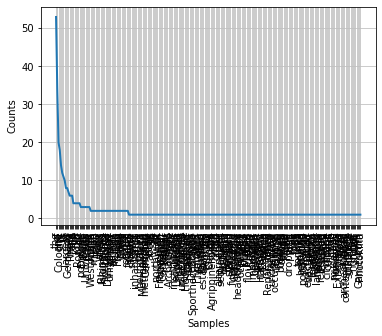

In [54]:
frequencies.plot()

#### Counter Approach

In [55]:
Counter(tokenized_text).most_common(10)

[('the', 53),
 ('of', 34),
 ('and', 20),
 ('Cologne', 18),
 ('city', 14),
 ('in', 12),
 ('is', 11),
 ('s', 10),
 ('largest', 8),
 ('as', 8)]

#### spaCy Approach

In [56]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(cologne)

frequencies = doc.count_by(spacy.attrs.IDS['ORTH'])

frequencies

{432: 1,
 24251518153235700: 1,
 105500112762911502: 1,
 303894265455322974: 1,
 313188162254974305: 4,
 579043611916083110: 1,
 612863283393206791: 1,
 631425121691394544: 1,
 773980847981339143: 1,
 880775317940149168: 1,
 886050111519832510: 34,
 888751574138454126: 18,
 942632335873952620: 1,
 962983613142996970: 3,
 977517753744608976: 1,
 986123062041987797: 3,
 986618548386337475: 1,
 1000530315840773259: 1,
 1248239241591158246: 2,
 1289759116526216761: 2,
 1322442146463163273: 1,
 1532693036686763602: 1,
 1613974210813357845: 1,
 1687215219543318037: 1,
 1747952955844753189: 1,
 1754670485160013151: 1,
 1818853483982459826: 1,
 1868285893322142039: 2,
 1927409805714339930: 1,
 1981369483889450574: 1,
 2084334952704276755: 2,
 2133265715002333624: 2,
 2160362229054775535: 1,
 2283656566040971221: 20,
 2283951321596367051: 1,
 2326625430448217935: 1,
 2363646560689767403: 1,
 2380246478874457969: 2,
 2466615745961202537: 1,
 2472857369998538979: 1,
 2531821090233205420: 2,
 2593

If we have the index of a given word (entry in the vocabulary), we can easily retrieve the text.

In [57]:
doc.vocab[7425985699627899538].text

'the'

In [58]:
for vocab_index, count in frequencies.items():
    human_readable = doc.vocab[vocab_index].text
    print(human_readable, count)

Cologne 18
is 11
the 53
largest 8
city 14
of 34
Germany 7
's 10
most 6
populous 3
federal 1
state 1
North 2
Rhine 6
- 6
Westphalia 2
and 20
fourth 1
in 12
. 21
With 2
slightly 1
over 1
a 4
million 2
inhabitants 1
( 11
1.09 1
) 11
within 1
its 2
boundaries 1
, 22
on 4
also 2
both 1
Ruhr 2
Metropolitan 1
Region 1
which 2
one 6
Europe 3
major 3
metropolitan 1
areas 2
Rhineland 2
Centered 1
left 1
bank 1
about 1
45 1
kilometres 2
28 1
mi 2
southeast 2
capital 2
Düsseldorf 2
25 1
16 1
northwest 1
Bonn 3
It 1
Central 1
Franconian 1
Ripuarian 1
dialect 1

 3
The 4
Cathedral 1
Kölner 1
Dom 1
seat 1
Catholic 1
Archbishop 1
There 1
are 1
many 2
institutions 1
higher 1
education 1
notably 1
University 3
Universität 1
zu 1
Köln 4
oldest 1
universities 1
Technical 1
Technische 1
Hochschule 1
university 2
applied 1
sciences 1
German 1
Sport 1
Deutsche 1
Sporthochschule 1
only 1
sport 1
Airport 2
Flughafen 1
/ 1
seventh 1
airport 2
lies 1
main 1
for 2
region 2
was 3
founded 1
established 1
Ubii 2
ter

### Exercise 11 - Computing Basic Statistics

We use `textdirectory` to load the HUM19UK corpus. Then we are selecting a random sample of 10 texts and transform everything to lowercase.

In [59]:
hum19uk = textdirectory.TextDirectory(directory='python-programming-for-linguists/2020/data/corpora/hum19uk', autoload=True)
hum19uk.filter_by_random_sampling(10)
hum19uk.stage_transformation(['transformation_lowercase'])

In [60]:
hum19uk.transform_to_memory()
hum19uk.print_aggregation()


|------------------------------------------------------------------------------|
|path                     |filename|characters|tokens|transformed_text         |
|------------------------------------------------------------------------------|
|python-programming-for-li|1803.txt|1026279   |181962|<title: thaddeus of warsa|
|python-programming-for-li|1890.txt|233102    |45038 |<title: the sign of the f|
|python-programming-for-li|1895.txt|806239    |153958|﻿<title: jude the obscure|
|python-programming-for-li|1807.txt|711200    |122255|<title: drelincourt and r|
|python-programming-for-li|1871.txt|1057480   |198513|﻿<title: joshua marvel>< |
|python-programming-for-li|1842.txt|665126    |119138|﻿<title: windsor castle> |
|python-programming-for-li|1841.txt|965319    |177641|<title: charles o’malley,|
|python-programming-for-li|1893.txt|589896    |108662|﻿<title: miss stuart's le|
|python-programming-for-li|1825.txt|293155    |53150 |<title: richelieu, v. 1/3|
|python-programming-for-li|

For the `get_frequencies` function we are relying on the Counter approach from above.

#### Basic Approach

Tokenizing in the `get_frequencies` function is convenient for us here. However, this will inevitable lead to us tokenizing some texts more than once - something you would not want to do in a real-life scenario in order to save time and resources.

In [61]:
def get_frequencies(text):
  tokenized_text = tokenize(text)
  frequencies = Counter(tokenized_text)

  return frequencies

The `Counter` has a nice additional property. `Counter` objects will return 0 if the element is not present.

In [62]:
 test_text = 'The cat is black'
 f_cat = get_frequencies(test_text)['cat']
 f_dog = get_frequencies(test_text)['dog']

 f_cat, f_dog

(1, 0)

In [63]:
def relative_frequency(abs_frequency, no_of_tokens):
  return (abs_frequency / no_of_tokens) * 10000

In [64]:
def frequency_across_text(search_term, texts):
  frequency_list = []

  for text in texts:
    frequencies = get_frequencies(text)
    frequency_list.append(frequencies[search_term])

  return frequency_list

To normalize the frequency counts, we need the number of tokens in the corpus. We can get this number by getting the length (`len`) of the tokenized text.

In [65]:
def frequency_across_text_relative(search_term, texts):
  frequency_list = []

  for text in texts:
    frequencies = get_frequencies(text)
    no_of_tokens = len(tokenize(text))
    relative_frequency_of_search_term = relative_frequency(frequencies[search_term], no_of_tokens)
    frequency_list.append(relative_frequency_of_search_term)

  return frequency_list

This list comprehension will generate a list of strings, each containing the text of one document.

In [66]:
texts = [doc['transformed_text'] for doc in list(hum19uk.get_aggregation())]

We are now generating the frequencies for *shook* for all texts and storing them in a list.

In [67]:
frequencies_across_texts = frequency_across_text('shook', texts)

In [68]:
frequencies_across_texts_relative = frequency_across_text_relative('shook', texts)

In [69]:
statistics.mean(frequencies_across_texts)

14

In [70]:
statistics.stdev(frequencies_across_texts)

8.472176684759223

In [71]:
statistics.mean(frequencies_across_texts_relative)

1.0572430023900492

#### Pandas DataFrame

We typecast (force a new type) the list of tokens into a set. This will remove all duplicates and provide us with an unsorted list of all types.

In [72]:
text = hum19uk.aggregate_to_memory()
tokenized_text = tokenize(text)
vocabulary = set(tokenized_text)

In [73]:
len(vocabulary)

30996

We could, but here we don't have to, turn this set into a list again. This way, we could order the vocabulary.

In [147]:
ordered_vocabulary = list(vocabulary)
ordered_vocabulary.sort()
ordered_vocabulary[20000:20010] # Getting a slice of types from the middle of the vocabulary

['brittan',
 'brittanny',
 'brittany',
 'brittl',
 'brittlit',
 'brittney',
 'britton',
 'brity',
 'brixton',
 'brizm']

In [75]:
# Initialize the frequency tables
frequency_table_abs = {}
frequency_table_rel = {}

We are looping over the vocabulary (all types in the corpus) and are adding the frequencies (both absolute and relative) to lists. Finally, after finishing a document, we are adding these lists to the frequency tables defined above.

In [76]:
for doc in hum19uk.get_aggregation():
  doc_frequencies = get_frequencies(doc['transformed_text'])

  doc_frequency_list_abs = []
  doc_frequency_list_rel = []

  for vocab in vocabulary:
    doc_frequency_list_abs.append(doc_frequencies[vocab])
    doc_frequency_list_rel.append(relative_frequency(doc_frequencies[vocab], doc['tokens']))

  frequency_table_abs[doc['filename']] = doc_frequency_list_abs
  frequency_table_rel[doc['filename']] = doc_frequency_list_rel


**Absolute Frequencies**

In [77]:
df_abs = pd.DataFrame(frequency_table_abs, index=vocabulary)
df_abs.head()

,1803.txt,1890.txt,1895.txt,1807.txt,1871.txt,1842.txt,1841.txt,1893.txt,1825.txt,1845.txt
crimsoned,3,0,0,6,0,0,1,0,0,0
visions,6,0,2,0,3,2,3,0,2,9
town,53,2,67,27,16,17,52,6,5,63
bargain,1,2,2,0,3,2,2,1,1,2
indiscreetly,0,0,0,0,0,0,0,1,0,0


In [78]:
df_abs.loc['the'].std()

2758.8979381871545

**Relative Frequencies**

In [79]:
df_rel = pd.DataFrame(frequency_table_rel, index=vocabulary)

In [80]:
df_rel.loc[['telegraph', 'the']]

,1803.txt,1890.txt,1895.txt,1807.txt,1871.txt,1842.txt,1841.txt,1893.txt,1825.txt,1845.txt
telegraph,0.000000,0.222035,0.064953,0.000000,0.000000,0.000000,0.000000,0.460142,0.00000,0.000000
the,575.339906,520.227364,460.969875,530.448652,459.718003,759.203613,564.453026,569.656366,670.74318,578.908623


We sort the DataFrame by its colums before plotting the frequencies for *telegraph*. Since in HUM19UK the files (and so the columns) have years as their names, this will provide us with a diachronic frequency plot.

Of course, this is now based only on our sample of ten. Increase the sample size and run all cells above to get a fuller picture.

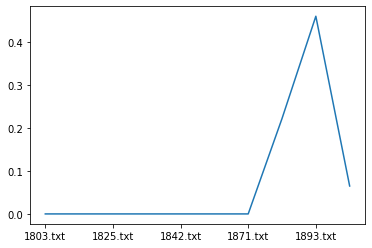

In [81]:
df_rel.reindex(sorted(df_rel.columns), axis=1).loc['telegraph'].plot()

We can sum up the frequencies across texts for all words. Plotting these, sorted by the total, will result in a (more or less) Zipfian distribution.

In [82]:
df_rel['total'] = df_rel.sum(axis=1)

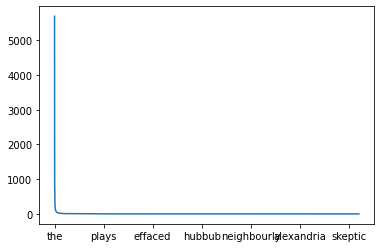

In [83]:
df_rel.sort_values(by='total', ascending=False)['total'].plot()

### Exercise 12 – NLTK Stemming, Lemmatization, and WordNet

In order to be able to use [WordNet](https://wordnet.princeton.edu), we have to download the database using NLTK.

In [84]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Stemming and Lemmatizing

Here, we are initializing two stemmers and one lemmatizer. The lemmatizer, as the name suggests, is based on underlying WordNet data.

In [85]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

Please note that there are more stemmers and lemmatizers in NLTK. An interesting one is, for example, the `SnowballStemmer`. *Snowball* is a stemming framework by Martin Porter. 

In [86]:
porter_stemmer.stem('connection')

'connect'

In [87]:
lancaster_stemmer.stem('connection')

'connect'

In [88]:
wordnet_lemmatizer.lemmatize('connection')

'connection'

We can also pass PoS tags to the `WordNetLemmatizer` to make it even better.

In [89]:
wordnet_lemmatizer.lemmatize('driving')

'driving'

In [90]:
wordnet_lemmatizer.lemmatize('driving', 'v')

'drive'

In [91]:
words = ['connection', 'become', 'caring', 'are', 'women', 'driving']

In [92]:
for word in words:
  ps = porter_stemmer.stem(word)
  ls = lancaster_stemmer.stem(word)
  wl = wordnet_lemmatizer.lemmatize(word) # We could provide the PoS

  print(f'{word} -  {ps}  {ls}  {wl}')

connection -  connect  connect  connection
become -  becom  becom  become
caring -  care  car  caring
are -  are  ar  are
women -  women  wom  woman
driving -  drive  driv  driving


As can be seen above, the three approaches lead to rather different results. The `LancasterStemmer` is the most aggressive but also the fastest of the three.

We can use the magic `%%timeit` command to test how fast these stemmers/lemmatizers work.

In [93]:
%%timeit
porter_stemmer.stem('become')

The slowest run took 4.77 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 21.6 µs per loop


In [94]:
%%timeit
lancaster_stemmer.stem('become')

The slowest run took 4.64 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.75 µs per loop


In [95]:
%%timeit
wordnet_lemmatizer.lemmatize('become')

The slowest run took 8.54 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.25 µs per loop


If we take the "best of 3" metrics, we can clearly see that the, arguably, inferior `LancasterStemmer`can save us a lot of time if we had a very large corpus. 

Of course, the lemmatizer was even faster. However, the lemmatizer will only work well if we have data that works nicely with, in this case, *WordNet*.

In [96]:
wordnet_lemmatizer.lemmatize('tweets')

'tweet'

#### WordNet Synsets

In [97]:
search_term = 'fantastic'

for synset in wordnet.synsets(search_term):
  for name in synset.lemma_names():
    print(name)

antic
fantastic
fantastical
grotesque
fantastic
grand
howling
marvelous
marvellous
rattling
terrific
tremendous
wonderful
wondrous
fantastic
wild
fantastic
fantastical
fantastic


### Exercise 13 – spaCy Tagging

In [98]:
wikipedia = textdirectory.TextDirectory(directory='python-programming-for-linguists/2020/data/wikipedia', autoload=True)

For this exercise we are using the smallest (pre-made) model for English available. If you need betters results, you might want to use a larger [model](https://spacy.io/usage/models).

In [99]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(wikipedia.get_text(0))

#### Sentence Segmentation

In [149]:
for sent in doc.sents:
  print(f'{sent}\n')

Cologne is the largest city of Germany's most populous federal state of North Rhine-Westphalia and the fourth-most populous city in Germany.

With slightly over a million inhabitants (1.09 million) within its city boundaries, Cologne is the largest city on the Rhine and also the most populous city both of the Rhine-Ruhr Metropolitan Region, which is Germany's largest and one of Europe's major metropolitan areas, and of the Rhineland.

Centered on the left bank of the Rhine, Cologne is about 45 kilometres (28 mi) southeast of North Rhine-Westphalia's capital of Düsseldorf and 25 kilometres (16 mi) northwest of Bonn.

It is the largest city in the Central Franconian and Ripuarian dialect areas.


The city's Cologne Cathedral (Kölner Dom) is the seat of the Catholic Archbishop of Cologne.

There are many institutions of higher education in the city, most notably the University of Cologne (Universität zu Köln), one of Europe's oldest and largest universities, the Technical University of Co

#### Tagging / Annotation

spaCy documents consist of tokens. Each token, given the default processing pipeline, also has a lemma, a PoS tag, and its dependencies attached to it. 

In [101]:
for token in doc[0:10]:
  print(token.text, token.lemma_, token.tag_, token.dep_)

Cologne Cologne NNP nsubj
is be VBZ ROOT
the the DT det
largest large JJS amod
city city NN attr
of of IN prep
Germany Germany NNP poss
's 's POS case
most most RBS advmod
populous populous JJ amod


We can also loop over all of the named entities. The results here are not great, but this is due to the small model we are using.

In [102]:
for ent in doc.ents[0:20]:
  print(ent.text, ent.label_)

Germany GPE
North Rhine-Westphalia GPE
fourth ORDINAL
Germany GPE
slightly over a million CARDINAL
1.09 million CARDINAL
Cologne GPE
Rhine GPE
the Rhine-Ruhr Metropolitan Region ORG
Germany GPE
Europe LOC
Rhineland ORG
Cologne GPE
about 45 kilometres QUANTITY
28 CARDINAL
North Rhine-Westphalia's GPE
Düsseldorf LOC
25 kilometres QUANTITY
Bonn GPE
the Central Franconian LOC


#### Dependency Graph

`doc.sents` is a generator. The `next` function will simply provide us with the next available elements.

In [103]:
sentence = next(doc.sents)
displacy.render(sentence, style='dep', jupyter=True)

### Exercise 14 - Parsing XML

In [104]:
with open('python-programming-for-linguists/2020/data/xml/bnc_style.xml', 'r') as f:
  xml = f.read()

xml

'<s n="1">\n    <w c5="PNP" hw="i" pos="PRON">I </w>\n    <w c5="VHB" hw="have" pos="VERB">have </w>\n    <w c5="VVN" hw="buy" pos="VERB">bought </w>\n    <w c5="AT0" hw="a" pos="ART">a </w>\n    <w c5="NN1" hw="car" pos="SUBST">car</w>\n    <c c5="PUN">.</c>\n</s>'

#### RegEx-Based Approach

In [105]:
def find_elements_re(xml, attribute, att_value):
  regex = re.compile(f'(<.*{attribute}="{att_value}".*?>(.*)<\/.*?>)')

  xml_elements = re.findall(regex, xml)

  return [element[1].strip() for element in xml_elements]

In [106]:
find_elements_re(xml, 'pos', 'VERB')

['have', 'bought']

#### Parsing Approach (using *LXML*)


In [107]:
def find_elements_lxml(xml, attribute, att_value):
  tree = lxml.etree.parse(StringIO(xml))
  root = tree.getroot()

  # findall support XPath (see below)
  elements = root.findall(f"w[@{attribute}='{att_value}']")

  for element in elements:
    print(element.text)

In [108]:
find_elements_lxml(xml, 'pos', 'VERB')

have 
bought 


##### XPath

In [109]:
tree = lxml.etree.parse('python-programming-for-linguists/2020/data/xml/xpath_example.xml')

Get *verbs* on page one.

In [110]:
elements = tree.findall(f"/page[@pg_nr='1']/s/w[@pos='verb']")

[element.text for element in elements]

['was', 'smelled']

Get the first word in the second sentence on page two.

In [111]:
elements = tree.findall(f"/page/[@pg_nr='2']/s[2]/w[1]")
[element.text for element in elements]

['They']

### Exercise 15 - Web Scraping

#### HTML and *BeautifulSoup* Parsing

In [112]:
def scrape_wikipedia(url):
  html = requests.get(url)
  soup = BeautifulSoup(html.content)

  content = soup.find('div', {'id': 'bodyContent'})

  return content.text

In [113]:
scrape_wikipedia('https://en.wikipedia.org/wiki/COVID-19_pandemic')

'\nFrom Wikipedia, the free encyclopedia\n\n\n\nJump to navigation\nJump to search\nOngoing pandemic of coronavirus disease 2019\n\n\nCOVID‑19 pandemicConfirmed deaths per 1,000,000 populationas of 18 January 2021\n\nCases per capita\n\nConfirmed cases per 100,000 population as of 17 January 2021\n.mw-parser-output .div-col{margin-top:0.3em;column-width:30em}.mw-parser-output .div-col-small{font-size:90%}.mw-parser-output .div-col-rules{column-rule:1px solid #aaa}.mw-parser-output .div-col dl,.mw-parser-output .div-col ol,.mw-parser-output .div-col ul{margin-top:0}.mw-parser-output .div-col li,.mw-parser-output .div-col dd{page-break-inside:avoid;break-inside:avoid-column}.mw-parser-output .legend{page-break-inside:avoid;break-inside:avoid-column}.mw-parser-output .legend-color{display:inline-block;min-width:1.25em;height:1.25em;line-height:1.25;margin:1px 0;text-align:center;border:1px solid black;background-color:transparent;color:black}.mw-parser-output .legend-text{}\xa0\xa0>10,000

Since we are parsing the HTML (similarly to how we used `LXML`), we could also, for example, get all *H2* headlines:

In [114]:
html = requests.get('https://en.wikipedia.org/wiki/COVID-19_pandemic')
soup = BeautifulSoup(html.content)
h2_headlines = soup.find_all('h2') # This will get all H2 HTML elements

[h2_headline.text for h2_headline in h2_headlines]

['Contents',
 'Epidemiology',
 'Disease',
 'Mitigation',
 'History',
 'National responses',
 'International responses',
 'Impact',
 'Information dissemination',
 'See also',
 'Notes',
 'References',
 'Further reading',
 'External links',
 'Navigation menu']

#### jusText Approach

In the jusText repository you can find a [description of the boilerplate cleaning algorithm](https://github.com/miso-belica/jusText/blob/dev/doc/algorithm.rst).

In [115]:
def scrape_wikipedia_jt(url):
  html = requests.get(url)
  paragraphs = justext.justext(html.content, justext.get_stoplist('English'))

  text = []

  for paragraph in paragraphs:
    if not paragraph.is_boilerplate:
      text.append(paragraph.text)

  # Combine the paragraphs into one string
  text = ' '.join(text)

  return text

In [116]:
scrape_wikipedia_jt('https://en.wikipedia.org/wiki/COVID-19_pandemic')

'Symptoms of COVID-19 are highly variable, ranging from none to severe illness. The virus spreads mainly through the air when people are near each other.[b] It leaves an infected person as they breathe, cough, sneeze, or speak and enters another person via their mouth, nose, or eyes. It may also spread via contaminated surfaces. People remain infectious for up to two weeks, and can spread the virus even if they do not show symptoms.[9] The earliest known person with symptoms was later discovered to have fallen ill on 1December 2019, and that person did not have visible connections with the later wet market cluster.[21][22] However, an earlier case of infection could have occurred on 17 November.[23] Of the early cluster of cases reported that month, two thirds were found to have a link with the market.[24][25][26] There are several theories about when and where the very first case (the so-called patient zero) originated.[27] It is possible that the virus first emerged in October 2019.[

### Exercise 16 - Putting Everything Together

#### 1. Compiling a Tiny Wikipedia Corpus

In [117]:
article_urls = [
                'https://en.wikipedia.org/wiki/Linguistics',
                'https://en.wikipedia.org/wiki/Sociolinguistics',
                'https://en.wikipedia.org/wiki/Language_change'
]

Since we want all articles in one document (string), we start with an empty string and add the content for each article to it.

In [118]:
wikipedia = ''

for url in article_urls:
  wikipedia += scrape_wikipedia_jt(url) + '\n' # Adding a linebreak after each article

We are transforming the whole text (corpus) into lowercase; this reduces the amount of types. We are also generating a tokenized version (list) of the corpus.

In [119]:
wikipedia = wikipedia.lower()
wikipedia_tokenized = tokenize(wikipedia)

#### 2. Reference Corpus

We are using the COCA sampler as our reference corpus. Since we transformed the target corpus (Wikipedia) to lowercase, we will do the same to the reference.

In [120]:
coca_sampler = textdirectory.TextDirectory(directory='python-programming-for-linguists/2020/data/corpora/coca', autoload=True)
coca_sampler.stage_transformation(['transformation_lowercase'])

In [121]:
reference_corpus = coca_sampler.aggregate_to_memory()
reference_corpus_tokenized = tokenize(reference_corpus)

#### 3. Frequency Lists

As in Exercise 10, we are getting the vocabulary of both corpora.

In [122]:
vocabulary = set(reference_corpus_tokenized + wikipedia_tokenized)

Now, again very similarly to Exercise 10, we can generate a frequency table. We are using `enumerate` to get labels (Target/Wikipedia = 0, Reference/COCA = 1) for the two corpora.

In [123]:
frequency_table = {}

for i, corpus in enumerate([wikipedia, reference_corpus]):
  frequency_list = []

  corpus_frequencies = get_frequencies(corpus)

  for vocab in vocabulary:
    frequency_list.append(corpus_frequencies[vocab])

  frequency_table[i] = frequency_list

In [124]:
df_keyness = pd.DataFrame(frequency_table, index=vocabulary)
df_keyness.head()

,0,1
sabinson,0,1
photocopy,0,6
legget,0,7
dellin,0,1
violator,0,2


#### 4. Keyness Statistics

We are using *Kilgariff's Simple Math Parameter* as our keyness statistic.

In [125]:
def smp(f_word_c0, f_word_c1, cs0, cs1, k=100):
  rel_f_word_c0 = relative_frequency(f_word_c0, cs0)
  rel_f_word_c1 = relative_frequency(f_word_c1, cs1)

  smp = (rel_f_word_c0 + k) / (rel_f_word_c1 + k)

  return smp

To get some intuition on the SMP, we can have a look at two equally large (1000 tokens) corpora. If the word appears 1000 times in the target and 100 times in the reference, the SMP will be, based on *k*, ten. The *k* parameter works almost as a filter. The lower you set the parameter, the more low-frequency items you will 'get'.

In [126]:
smp(1000, 100, 1000, 1000)

9.181818181818182

In [127]:
df_keyness.head()

,0,1
sabinson,0,1
photocopy,0,6
legget,0,7
dellin,0,1
violator,0,2


We can retrieve the corpus sizes by simple checking the length of the token lists.

In [128]:
cs0 = len(wikipedia_tokenized)
cs1 = len(reference_corpus_tokenized)

We can calculate the SMP value for each row (word) by using `.apply` and a Lambda.

In [129]:
df_keyness['SMP'] = df_keyness.apply(lambda row : smp(row[0], row[1], cs0, cs1), axis=1)

In [130]:
df_keyness.head()

,0,1,SMP
sabinson,0,1,0.999990
photocopy,0,6,0.999937
legget,0,7,0.999927
dellin,0,1,0.999990
violator,0,2,0.999979


In order to get the actual keywords, we can sort the DataFrame by the newly created SMP value and a given cutoff (e.g., 1.5)

In [131]:
df_keyness[df_keyness['SMP'] > 1.5].sort_values('SMP', ascending=False)

,0,1,SMP
language,222,1287,3.070407
of,493,218668,1.732789
languages,63,198,1.595958
linguistics,61,6,1.580135
linguistic,61,49,1.579426


#### Bonus: Stemmed Version

As you can see, in the keyword list we can see that *language* and *languages*, for example, are listed as two keywords. We can use stemming to get a better (well, dependent on your RQ) result.

This, for the sake of readability and understandability, is just a redefinition of the functions from above.

In [132]:
def smp(f_word_c0, f_word_c1, cs0, cs1, k=100):
  rel_f_word_c0 = relative_frequency(f_word_c0, cs0)
  rel_f_word_c1 = relative_frequency(f_word_c1, cs1)

  smp = (rel_f_word_c0 + k) / (rel_f_word_c1 + k)

  return smp


def scrape_wikipedia_jt(url):
  html = requests.get(url)
  paragraphs = justext.justext(html.content, justext.get_stoplist('English'))

  text = []

  for paragraph in paragraphs:
    if not paragraph.is_boilerplate:
      text.append(paragraph.text)

  # Combine the paragraphs into one string
  text = ' '.join(text)

  return text


def tokenize(text):
  return re.findall(r'\w+', text)

Since we are now stemming our corpus we already have tokenized versions of them. Hence, we do not need/want our `get_frequencies` function to tokenize the text.

In [133]:
def get_frequencies_tokenized_text(tokenized_text):
  frequencies = Counter(tokenized_text)

  return frequencies

We need a new function which stems a text (well, a list of tokens). This function takes in a list of tokens and constructs a new list of stemmed tokens using the `LancasterStemmer`.

In [134]:
def stem_tokenized_text(text):

  tokens = []

  for token in text:
    tokens.append(lancaster_stemmer.stem(token))

  return tokens

Of course, we could achieve the same thing using a list comprehension:

In [135]:
text = 'The cars were driving to through the night.'

In [136]:
[lancaster_stemmer.stem(token) for token in tokenize(text)]

['the', 'car', 'wer', 'driv', 'to', 'through', 'the', 'night']

In [137]:
article_urls = [
                'https://en.wikipedia.org/wiki/Linguistics',
                'https://en.wikipedia.org/wiki/Sociolinguistics',
                'https://en.wikipedia.org/wiki/Language_change'
]

wikipedia = ''

for url in article_urls:
  wikipedia += scrape_wikipedia_jt(url)

wikipedia = wikipedia.lower()
wikipedia_tokenized = tokenize(wikipedia)
wikipedia_stemmed = stem_tokenized_text(wikipedia_tokenized)

coca_sampler = textdirectory.TextDirectory(directory='python-programming-for-linguists/2020/data/corpora/coca', autoload=True)
coca_sampler.stage_transformation(['transformation_lowercase'])

reference_corpus = coca_sampler.aggregate_to_memory()
reference_corpus_tokenized = tokenize(reference_corpus)
reference_corpus_stemmed = stem_tokenized_text(reference_corpus_tokenized)

# We need to generate a stemmed version of the vocabulary
vocabulary = set(wikipedia_stemmed + reference_corpus_stemmed)

frequency_table = {}

for i, corpus in enumerate([wikipedia_stemmed, reference_corpus_stemmed]):
  frequency_list = []

  # We need to get the frequencies for the stemmed/tokenized version.
  corpus_frequencies = get_frequencies_tokenized_text(corpus)

  for vocab in vocabulary:
    frequency_list.append(corpus_frequencies[vocab])

  frequency_table[i] = frequency_list

df_keyness = pd.DataFrame(frequency_table, index=vocabulary)

df_keyness['SMP'] = df_keyness.apply(lambda row : smp(row[0], row[1], cs0, cs1), axis=1)

df_keyness[df_keyness['SMP'] > 1.5].sort_values('SMP', ascending=False)

,0,1,SMP
langu,285,1489,3.654113
lingu,149,75,2.415401
study,87,3977,1.754677
of,493,218676,1.732745
word,77,3655,1.668737
vary,73,3015,1.642662


Of course this output is far from pretty (also due to using the relatively fast `LancasterStemmer`). However, it bins linguistic items which belong together.

Also note that this approach does not only work for word frequencies. We could just as well, for example, count PoS tags and look for 'keytags' instead of keywords.